#### Chuẩn bị data: các bước giống với lúc trích xuất data cho tập train

B1: Tạo 1 folder đặt tên data_testing là thư mục con của data_testing<br/>
B2: Download video testing và lưu vào folder đó

In [92]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import mediapipe as mp
import pandas as pd
import os, sys
import warnings

# Thêm đường dẫn dẫn đến thư mục cha
sys.path.append(os.path.abspath(".."))
warnings.filterwarnings("ignore")

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

from utils.common import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# Load model
RF_model = load_model('./best_models/RF_model.pkl')

# Load input scaler
input_scaler = load_model("./best_models/input_scaler.pkl")

### 1. Determine important landmarks for plank

In [94]:
def get_class(encode_label: float):
    return {
        0: "D",
        1: "M",
        2: "S"
    }.get(encode_label, "Unknown")

#### Testing

In [95]:
test_df = pd.read_csv("test.csv")

In [96]:
test_df.shape

(124, 40)

In [97]:
test_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,D,-0.188812,-0.171709,-0.214638,-0.086462,-0.132751,-0.494800,-0.095460,-0.139928,0.151312,...,-0.033859,-0.029294,0.122714,0.708366,0.256963,0.160005,-0.198035,-0.128389,0.137517,0.685853
1,D,-0.186701,-0.183714,-0.165627,-0.084256,-0.145975,-0.452867,-0.098829,-0.144310,0.208673,...,0.003657,-0.065187,0.154261,0.605460,0.209659,0.183710,-0.150381,-0.176534,0.157657,0.579962
2,D,-0.095342,-0.193881,-0.212784,-0.002758,-0.155362,-0.489454,-0.025064,-0.149781,0.169196,...,-0.132103,-0.031787,0.130546,0.639283,0.220640,0.171312,-0.258583,-0.134821,0.138523,0.620730
3,D,-0.156035,-0.184746,-0.236430,-0.061096,-0.146589,-0.517227,-0.064322,-0.146808,0.153190,...,0.078390,-0.039509,0.123454,0.665509,0.208490,0.160258,-0.029561,-0.139586,0.129376,0.650913
4,D,-0.109105,-0.198319,-0.189125,-0.021823,-0.154401,-0.466572,-0.017113,-0.156044,0.203104,...,0.313632,0.238760,0.133670,0.527830,-0.240985,0.174173,0.256747,0.144418,0.154862,0.501323


In [98]:
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

#### Chuẩn hoá dữ liệu

In [99]:
X_test = input_scaler.transform(X_test)

In [100]:
X_test

array([[-4.39418799e+00,  1.31961988e+00, -9.09742389e-01, ...,
        -1.53366106e+00, -1.35590044e+00,  2.95787897e+00],
       [-4.34503812e+00,  1.07374285e+00, -5.60979697e-01, ...,
        -2.13616937e+00, -1.05517001e+00,  2.43998766e+00],
       [-2.21863454e+00,  8.65492372e-01, -8.96546164e-01, ...,
        -1.61414767e+00, -1.34089094e+00,  2.63937418e+00],
       ...,
       [ 2.89043036e+00,  4.54083415e-01,  5.52612927e-02, ...,
         2.48724571e-02,  2.30786135e-02, -5.39470084e-01],
       [ 2.62045149e+00,  3.06346609e-01, -2.14150100e-01, ...,
         1.70651220e-01,  4.74939866e-02, -3.19745105e-01],
       [ 2.20938800e+00,  7.32388182e-01, -4.75812477e-02, ...,
         8.36213718e-02, -2.94059815e-03, -9.65240679e-01]])

In [101]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [102]:
y_pred = RF_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

In [103]:
accuracy = round(accuracy, 2)
accuracy

0.82

In [104]:
test_df

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,D,-0.188812,-0.171709,-0.214638,-0.086462,-0.132751,-0.494800,-0.095460,-0.139928,0.151312,...,-0.033859,-0.029294,0.122714,0.708366,0.256963,0.160005,-0.198035,-0.128389,0.137517,0.685853
1,D,-0.186701,-0.183714,-0.165627,-0.084256,-0.145975,-0.452867,-0.098829,-0.144310,0.208673,...,0.003657,-0.065187,0.154261,0.605460,0.209659,0.183710,-0.150381,-0.176534,0.157657,0.579962
2,D,-0.095342,-0.193881,-0.212784,-0.002758,-0.155362,-0.489454,-0.025064,-0.149781,0.169196,...,-0.132103,-0.031787,0.130546,0.639283,0.220640,0.171312,-0.258583,-0.134821,0.138523,0.620730
3,D,-0.156035,-0.184746,-0.236430,-0.061096,-0.146589,-0.517227,-0.064322,-0.146808,0.153190,...,0.078390,-0.039509,0.123454,0.665509,0.208490,0.160258,-0.029561,-0.139586,0.129376,0.650913
4,D,-0.109105,-0.198319,-0.189125,-0.021823,-0.154401,-0.466572,-0.017113,-0.156044,0.203104,...,0.313632,0.238760,0.133670,0.527830,-0.240985,0.174173,0.256747,0.144418,0.154862,0.501323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,S,0.109760,-0.218860,-0.104785,0.036277,-0.166297,0.206258,0.009250,-0.169156,-0.374013,...,0.518115,-0.095742,0.220003,0.189498,0.004409,0.211734,0.434667,0.003892,0.225356,0.063040
120,S,0.084680,-0.211593,-0.100082,0.025232,-0.160264,0.281529,0.004758,-0.164270,-0.424953,...,0.523798,-0.114086,0.231541,0.040805,-0.003055,0.221339,0.421677,-0.008961,0.237569,-0.117987
121,S,0.124164,-0.213968,-0.079028,0.046866,-0.166525,0.243849,0.020902,-0.174148,-0.373913,...,0.497135,-0.112618,0.222845,0.107877,0.007214,0.212359,0.417534,-0.003851,0.229866,-0.029231
122,S,0.112565,-0.221181,-0.116888,0.026629,-0.171135,0.211301,0.008108,-0.175707,-0.398875,...,0.562434,-0.095951,0.228298,0.160943,0.017881,0.210665,0.476202,0.007798,0.231501,0.015695


In [105]:
test_df.insert(0, "predicted_label", label_encoder.inverse_transform(y_pred))

In [106]:
# test_df.to_csv("test.csv", index=False)

### Kết luận

In [107]:
cf = confusion_matrix(y_test, y_pred)

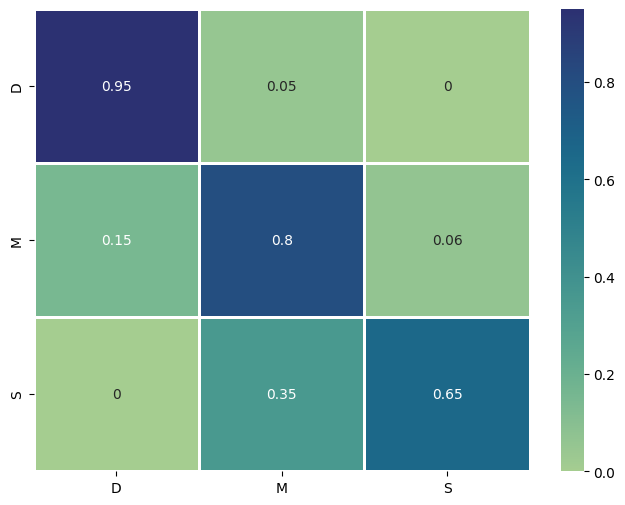

In [108]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = np.sum(cf, axis=1)
cf = cf / label_counts[:, None]
cm_cross_val = np.round(cf, 2)
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["D", "M", "S"], columns=["D", "M", "S"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest");